<a href="https://colab.research.google.com/github/Meisyamei/AI/blob/main/UAS_Meisya_Margareta_Yovita_20220801187.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clusteer data pada dataset kaggle

langkah pertama memuat dataset yang telah ada dengan menjaalankan syntax kode di bawah
files..upload digunakan agar dapat mengunggaah data ke dalam google colab

In [28]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (1).csv


kemudian import library pandas agar data dapat di baca dan mudah diproses

df = pd.read_csv() digunakan untuk meembaca fileee csv
df.head digunakan untuk menampilkan isi data (5 data)

In [29]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")  # Pastikan nama file sesuai dengan yang diunggah
df.head()  # Tampilkan 5 baris pertama


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


menghapus missing vaalue yang terdapat di dalam data menggunakan df.fropna disini saaya menggunaakaan kolom release_year dan duration untuk di analisa lebih lanjut karna rlevan..
kemudian mengonversi durasi ke dalam angka.

In [30]:
# fungsi untuk menghapus missing value
df.dropna(inplace=True)

# memilih fitur reeelevan yang akan di gunakan
features = ["release_year", "duration"]

#memastikan bahwa hanya bagian film yang di ambil bukan TV show, dan mengecek apakah  kolom duration mengandung kata "min"
if "duration" in df.columns:
    df = df[df["duration"].str.contains("min")]
    df["duration"] = df["duration"].str.replace(" min", "").astype(int) #mengkonversi kolom duratin yang semula string ke tipe integer

df.head()


<ipython-input-30-6d7ca4c73f10>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration"] = df["duration"].str.replace(" min", "").astype(int) #mengkonversi kolom duratin yang semula string ke tipe integer


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...


Normaalisasi fitur
deengan menggunakan StandarScaler untuk menormalisasikan release_year dan duration agar dapat memastikan bahwa fitur dengan rentang nilai yang besar tidak mendominasi algoritma.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#digunakan utuk normalisassi data yaitu mengubah data mean = 0 daan std=1
df_scaled = scaler.fit_transform(df[features]) # menghitung rataa rata kemudian menerapkan normalisasi ke data yagn ada dan di simpan ke df_scaled


Menggunakan KMeans untuk melakukan clustering pada dataset dengan jumlah 3 cluster kemudian hasil cluster akan di simpan dalam cluster.

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42) # menginisialisasi algoritma dengan 3 cluster
df["cluster"] = kmeans.fit_predict(df_scaled) #Dmenghitung kemudian meengelompokkan cluster

df.head()  # Lihat hasil clustering


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,2
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...,0


Visualisasi clustering dengan scatter plot
Visualisasi hasil clustering menggunakan scatter plot dengan release year di sumbu x dan duration di sumbu y. Warna titik menunjukkan cluster yang berbeda

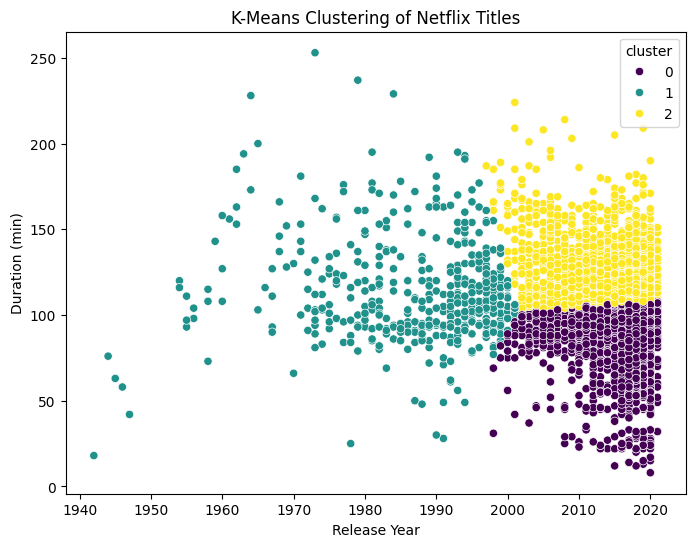

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
#fungsi yang di gunakan untuk membuat scatter plot
sns.scatterplot(x=df["release_year"], # menentukan sumbu x adalaah tahun
                y=df["duration"], #menentukan sumbu y adalah duraasi
                hue=df["cluster"], # menggunakan kolom cluster untuk memberi warna yang berbeda
                palette="viridis" # memilih palet warnaa
                )
plt.title("K-Means Clustering of Netflix Titles")
plt.xlabel("Release Year")
plt.ylabel("Duration (min)")
plt.show()


Membuat model logistic regression (machien learning)
menggunakaan kolom target untuk membuat klasifikasi apakaah filim di rilis setelaah 2015 aaatu tidaak jika iyaa maaka 1 daan tidak maakaa 0
kemudian menggunakan logistic regression untuk memprediksi target berdasarkan fitur release_year, duration dan clusster

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # instal model klasifikasi yang di gunakan untuk prediksi probabilitas berdasarkan fitur
from sklearn.metrics import accuracy_score, classification_report

df["target"] = (df["release_year"] > 2015).astype(int)

# Pilih fitur untuk model ML
X = df[["release_year", "duration", "cluster"]]
y = df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train) # melatih model menggunakan X train dan target Y train

y_pred = model.predict(X_test) #Menggunakan model yang sudah dilatih untuk memprediksi label (y_pred) dari data testing (X_test).
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy) # menghitung akurasi model dengan membandingkan hasil prediksi
print(classification_report(y_test, y_pred)) # memberikan laporan klasifikasi yang lebih lengkaap


Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       1.00      1.00      1.00       585

    accuracy                           1.00      1037
   macro avg       1.00      1.00      1.00      1037
weighted avg       1.00      1.00      1.00      1037



Model tanpa clustering
Model kedua dibuat tanpa menggunakan informasi cluster. Fitur yang digunakan hanya release_year dan duration.
Hasilnya dibandingkan dengan model sebelumnya yang menyertakan cluster untuk melihat apakah clustering meningkatkan performa.

In [35]:
# Model tanpa klaster
X_no_cluster = df[["release_year", "duration"]]
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_cluster, y, test_size=0.2, random_state=42)
# menggunakn dua fitur tanpa informasi clusteer
model_no_cluster = LogisticRegression()
model_no_cluster.fit(X_train_nc, y_train_nc)

y_pred_nc = model_no_cluster.predict(X_test_nc)
# menghitung akurasi dari model tanpa clustering
accuracy_nc = accuracy_score(y_test_nc, y_pred_nc)

print("Accuracy without Clustering:", accuracy_nc)


Accuracy without Clustering: 1.0


KESIMPULAN
-pengggunaan Standar Scaler untuk menormalkan data
algoritma Kmeaan dan Logistic regression sensitif terhadap daata jika data tidak di normalkan dengan rentang nilai yang lebih besar mendomainasi model sementara rentang nilai yang lebih kecil bisa terabaikan.

-Dengan mengelompokkan data menggunakan KMean kita dapat melihat bebrapa pola yng tersembunyi di dalam data misalnya, cluster pertama bisa berisi film-film lama dengan durasi pendek, sedangkan cluster kedua bisa berisi film baru dengan durasi lebih panjang.

-Jika model dengan clustering memberikan akurasi yang lebih tinggi daripada model tanpa clustering, maka kita bisa menyimpulkan bahwa informasi cluster memang relevan dan membantu dalam memperbaiki kualitas prediksi. Namun, jika perbedaan akurasi antara kedua model tidak signifikan, bisa jadi bahwa informasi clustering tidak menambah banyak nilai bagi prediksi target tersebut.

dengan langkah ini kita dapat membuat model yang akurat serta memahmibagaimana setiap langkah dalam pemrosesan data berkontribussi tehadap hasil akhir
